# Scalable pointilism from raster images
By Tyler Sloan (@Quorumetrix)

##### Imports

In [1]:
import numpy as np
import pandas as pd
import georasters as gr
import matplotlib.pyplot as plt

from PIL import Image # For importing a tiff

# For visualizing the raster
import rasterio
from rasterio.plot import show

from scipy import ndimage

# Datashder functions
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire
from matplotlib import cm

##### Paths

In [2]:
# Download the world population data from NASA-SEDAC"
# https://sedac.ciesin.columbia.edu/data/collection/gpw-v4
raster = 'Z://Open_data_sets//World data//Population//gpw_v4_population_count_rev10_2015_30_sec.tif'

##### Process the world population dataset (raster) to dataframe using Georasters

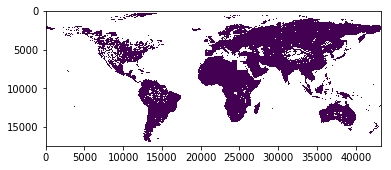

In [3]:
raster_data = rasterio.open(raster)
show(raster_data)

In [4]:
data = gr.from_file(raster)
print(type(data))

# Convert to Pandas DataFrame
df = data.to_pandas()
display(df)

<class 'georasters.georasters.GeoRaster'>


,row,col,value,x,y
0,224,12695,0.000001,-74.208333,83.133333
1,224,12696,0.000001,-74.200000,83.133333
2,224,12697,0.000002,-74.191667,83.133333
3,224,12698,0.000002,-74.183333,83.133333
4,224,12699,0.000002,-74.175000,83.133333
5,224,12700,0.000002,-74.166667,83.133333
6,224,12701,0.000002,-74.158333,83.133333
7,224,12702,0.000002,-74.150000,83.133333
8,224,12703,0.000002,-74.141667,83.133333
9,224,12704,0.000002,-74.133333,83.133333


In [5]:
# pop_array = np.transpose(np.vstack((df['x'],df['y'],df['value'])))

##### Example of Random sampling

In [6]:
n_ints = 1000000
max_int = 1000
max_int = 100

C:\Users\tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  


Text(0,0.5,'Frequency')

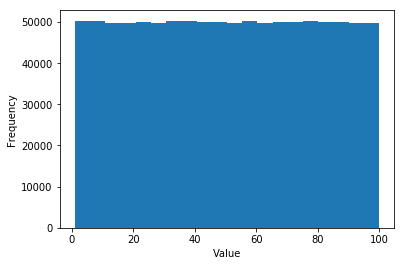

In [7]:
# Sample from a random uniform distribution
rand_list = np.random.random_integers(max_int, size=(n_ints,))
plt.hist(rand_list,20)                              
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

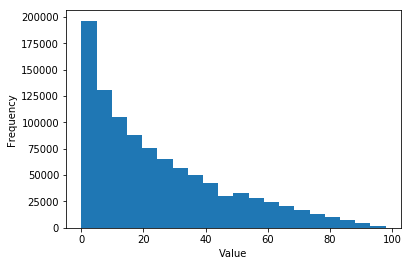

In [8]:
# Change the statistical distribution by adding randomness to the range of the uniform distribution
rand_list = []
for n in range(n_ints):
    rand_list.append(np.random.randint(0,np.random.randint(1,max_int)))
plt.hist(rand_list,20)  
plt.xlabel('Value')
plt.ylabel('Frequency')

C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


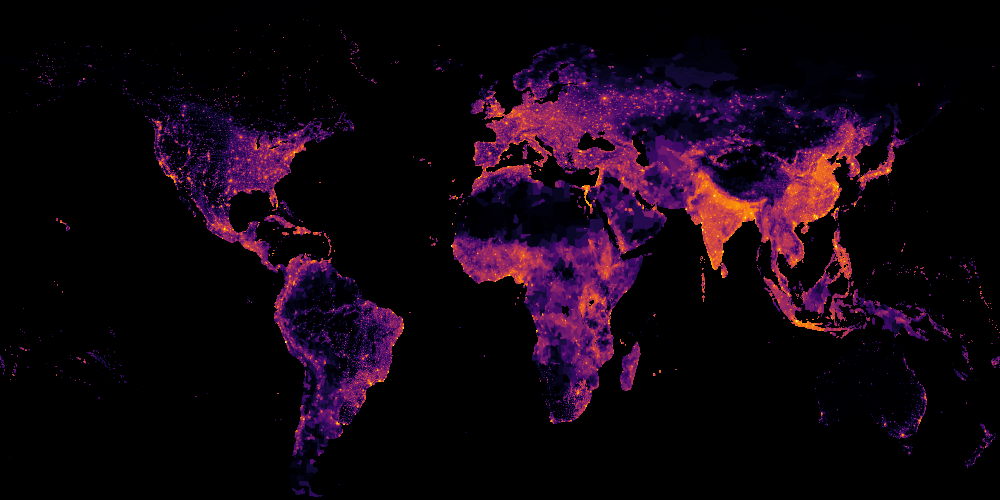

In [9]:
px_width = 1000
px_height = 500
cvs = ds.Canvas(plot_width=px_width, plot_height=px_height)#,x_range=x_range, y_range=y_range)  
agg = cvs.points(df, 'x', 'y',ds.mean('value'))
img = tf.set_background(tf.shade(agg, cmap=cm.inferno, how='log'),"black")
display(img)

##### Return a subset of the datafrane within a select range

In [10]:
def return_sub_df(input_df,xpos,ypos,x_range,y_range):
    # Do this backwards, instead of changing all the calls below
    new_minx_ll = x_range[0]
    new_maxx_ll = x_range[1]
    new_miny_ll = y_range[0]
    new_maxy_ll = y_range[1]
    
    # Define the new subset of the df
    sub_df = pd.DataFrame()
    sub_df = input_df.loc[(input_df['x'] >= new_minx_ll ) 
                     & (input_df['x'] <= new_maxx_ll)
                     & (input_df['y'] >= new_miny_ll)
                     & (input_df['y'] <= new_maxy_ll)
                     ] 

    return sub_df     

##### Return a dataframe for Europe

In [11]:
x_center = 6.380907
y_center = 48.496604
x_window = 40
y_window = 20

x_range = [x_center - x_window / 2, x_center + x_window / 2]
y_range = [y_center - y_window / 2, y_center + y_window / 2]

euro_subdf = return_sub_df(df,x_center,y_center,x_range,y_range)

##### Datashade-it

C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


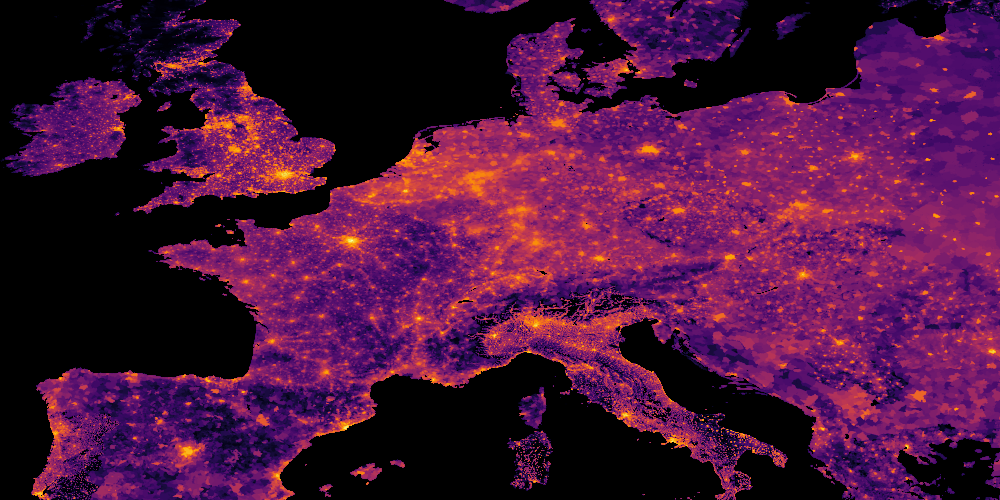

In [12]:
cvs = ds.Canvas(plot_width=px_width, plot_height=px_height)#,x_range=x_range, y_range=y_range)  
agg = cvs.points(euro_subdf, 'x', 'y',ds.mean('value'))
img = tf.set_background(tf.shade(agg, cmap=cm.inferno, how='log'),"black")
display(img)

##### Create a list of points using the random method.

In [13]:
euro_array = euro_subdf.values
euro_array = euro_array[euro_array[:,2].argsort()]
euro_array = np.flipud(euro_array)
display(euro_array)
print(np.shape(euro_array))

array([[ 4.33600000e+03,  2.18840000e+04,  2.65093379e+04,
         2.36666667e+00,  4.88666667e+01],
       [ 4.33600000e+03,  2.18850000e+04,  2.64519199e+04,
         2.37500000e+00,  4.88666667e+01],
       [ 4.33700000e+03,  2.18860000e+04,  2.57630254e+04,
         2.38333333e+00,  4.88583333e+01],
       ...,
       [ 5.51000000e+03,  2.36070000e+04,  1.10048961e-06,
         1.67250000e+01,  3.90833333e+01],
       [ 5.47600000e+03,  2.26420000e+04,  1.09222492e-06,
         8.68333333e+00,  3.93666667e+01],
       [ 5.52800000e+03,  2.06870000e+04,  1.01472233e-06,
        -7.60833333e+00,  3.89333333e+01]])

(6443247, 5)


In [14]:
def simulate_df_2d(df, n_samples, threshold=0, datashader=False, arrayout=False):
    df_array = df.values
    df_array = df_array[df_array[:,2].argsort()] # Sort by increasing order
    df_array = np.flipud(df_array) # Flip to be sorted by decreasing
    num_data = np.shape(df_array)[0] # number of data points
    points = np.empty([n_samples,2])
    n = 0

    while (n < n_samples):   
        
        data_ind = np.random.randint(0,np.random.randint(1,num_data))
        
        if(euro_array[data_ind,2] > threshold):
            points[n,0] = df_array[data_ind,3]
            points[n,1] = df_array[data_ind,4]
            n = n + 1
            
    sim_df = pd.DataFrame(data=points[:,:],
                columns=['x','y']) 
    
    if(datashader):
        cvs = ds.Canvas(plot_width=px_width, plot_height=px_height)#,x_range=x_range, y_range=y_range)  
        agg = cvs.points(sim_df, 'x', 'y')
        img = tf.set_background(tf.shade(agg, cmap=cm.inferno, how='linear'),"black")
        display(img)
    
    if(arrayout):
        np.save('europe_test1.npy',points)
    
    return sim_df

C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


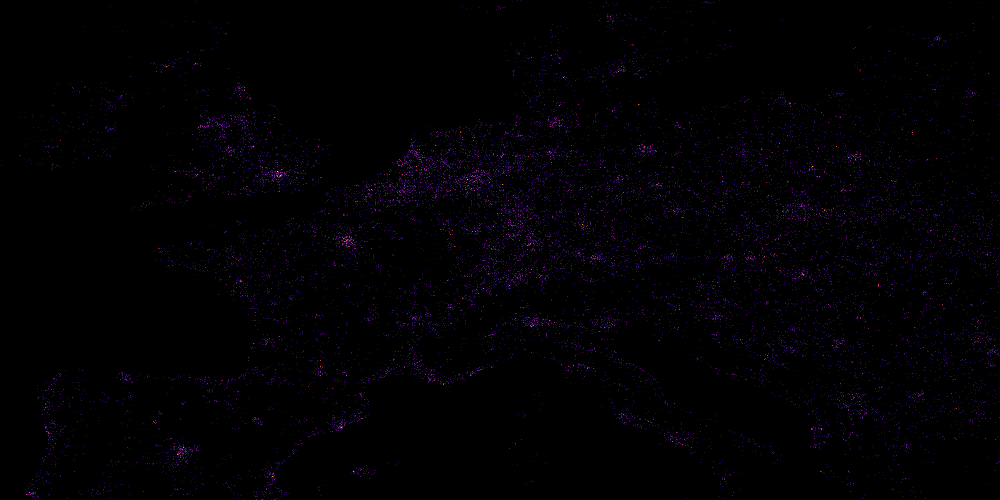

In [15]:
sim_df = simulate_df_2d(euro_subdf, 100000, threshold=0, datashader=True)

C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


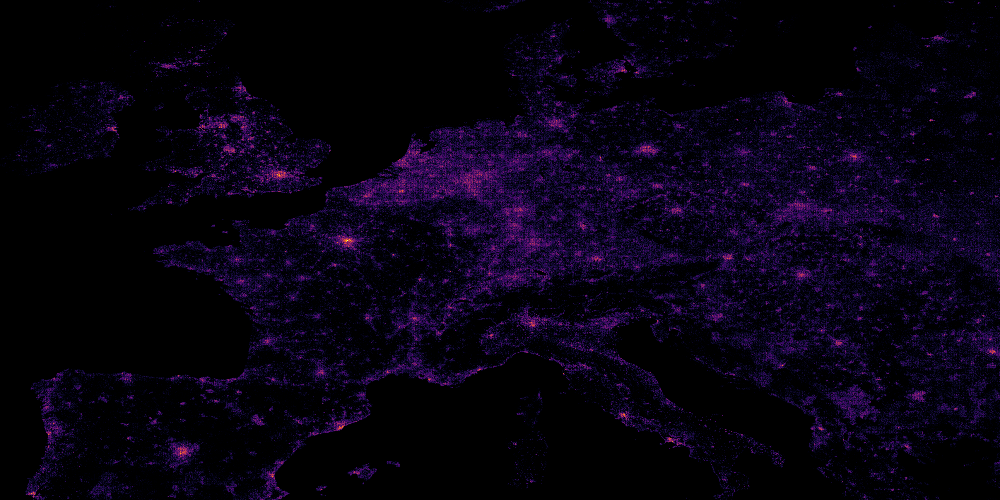

In [16]:
sim_df = simulate_df_2d(euro_subdf, 1000000, threshold=0, datashader=True)

C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


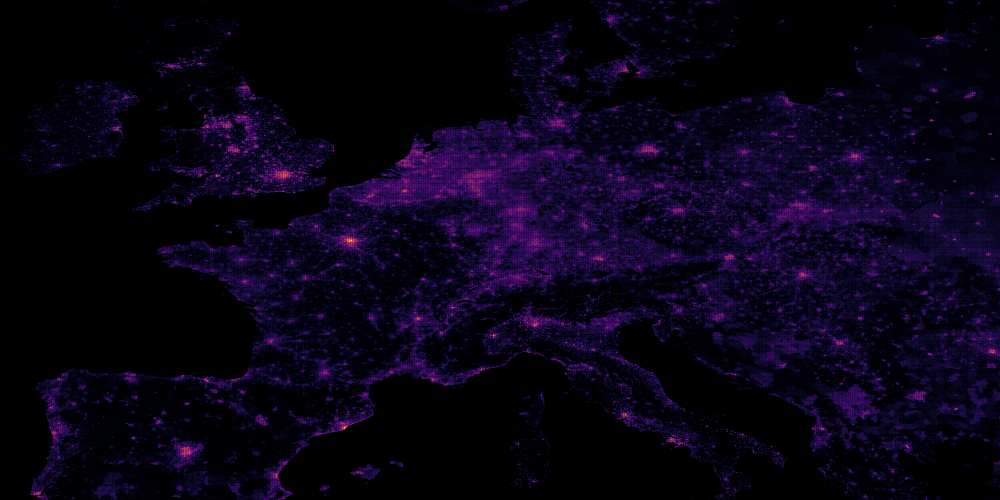

In [17]:
sim_df = simulate_df_2d(euro_subdf, 10000000, threshold=0, datashader=True, arrayout=True)

# That was easy to do in 2d with the coordinates supplied. Now consider a more difficult problem of converting a 3D tif 

Start by downloading the drosophila dataset from:
    http://fly.mpi-cbg.de/~pietzsch/bdv-example/
    For this examples I'm using the single file: 'spim_TL10_Angle4.ome.tiff'

In [18]:
tif_path = 'Z:\\Open_data_sets\\Microscopy\\drosophila\\frames\\spim_TL10_Angle4.ome.tiff'

# Image properties
image_width = 1344 # pixels
image_height = 1024 # pixels
image_depth = 63 # slices of tiff

In [19]:
# Create an array to hold values from multiple images of the stack (imstack)
img = Image.open(tif_path)
img.seek(0) # Get first page of multi-page tiff
imstack = np.asarray(img) # Start the cumulative array of slices.

In [20]:
n_slices = image_depth
for i in range(0,n_slices):
    try:
        img.seek(i)
        this_array = np.asarray(img)
        imstack = np.dstack((imstack,this_array))

    except EOFError:
        # Not enough frames in img
        break
    except MemoryError:
        # Not enough memory to do more concatenating images
        print('Memory error at slice: ' + str(i) +', imstack shape: '+ str(np.shape(imstack)))
        image_depth = np.shape(imstack)[2]
        break
    except ValueError:# Catches the case where a slice doesn't have the correct dimentions
        i = i + 1
        print("Slice skipped: " + str(i))

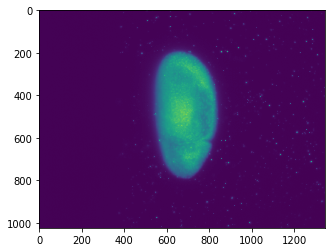

In [21]:
# Visualize the sum of the image stack
sumarray = imstack.sum(2)
plt.imshow(sumarray)

In [22]:
# Calculate the center of mass of the image (to center the model)
x_center_mass, y_center_mass = ndimage.measurements.center_of_mass(sumarray)
print(x_center_mass, y_center_mass)

5445.93070250374 7203.681790851817


In [23]:
# In case the image wasn't entirely load for memory reasons, update the loaded image depth.
image_depth = np.shape(imstack)[2]         

In [24]:
# Create a meshgrid to have the indices available...
x = np.arange(0, image_width, 1)
y = np.arange(0, image_height, 1)
z = np.arange(0, image_depth, 1)
X,Y,Z = np.meshgrid(x,y,z)

In [25]:
# Instead of reshaping imstack, us the unravel_index method
ind = np.unravel_index(np.argsort(imstack, axis=None), imstack.shape)

In [26]:
# Sort the arrays using ind 
Is = imstack[ind]
Xs = X[ind]
Ys = Y[ind]
Zs = Z[ind]

In [27]:
#Create a DataFrame containing the contents of the tif file
tif_df = pd.DataFrame(
    {'x': Xs,
     'y': Ys,
     'z': Zs,
     'intensity': Is})#, index=index, columns=columns)

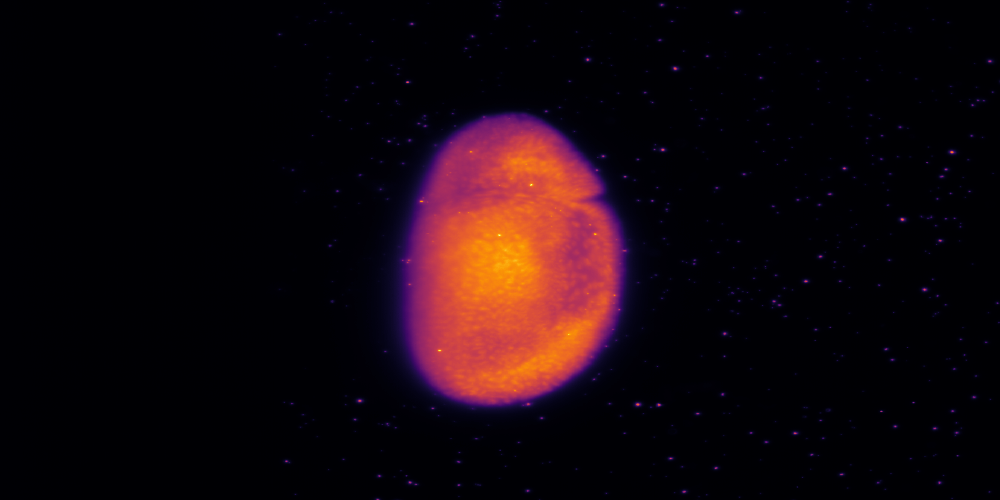

In [28]:
# Plot with datashader, averaging across intensity values
cvs = ds.Canvas(plot_width=px_width, plot_height=px_height)#,x_range=x_range, y_range=y_range)  
agg = cvs.points(tif_df, 'x', 'y',ds.mean('intensity') )
img = tf.set_background(tf.shade(agg, cmap=cm.inferno, how='linear'),"black")
display(img)

In [29]:
# Function to draw points from the tiff image
def simulate_df_3d(Xs,Ys,Zs, n_samples, threshold = 0,variance=0, datashader=False, arrayout=False):
    
    varx = image_width * variance / 100
    vary = image_height * variance / 100
    varz = image_depth * variance / 100
    
    num_data = len(Xs)
    points = np.empty([n_samples,3])
    n = 0

    while (n < n_samples):  
        
        # Slightly different from previously because not sorted in decreasing order:
        data_ind = len(Is) - np.random.randint(0,np.random.randint(1,len(Is)))
        if(data_ind < len(Is)):
            if(Is[data_ind] > threshold):
                if(variance==0):
                    points[n,0] = Xs[data_ind] - x_center_mass
                    points[n,1] = Ys[data_ind] - y_center_mass
                    points[n,2] = Zs[data_ind]
                else:
                    # If positional variance is zero, will return 
                    points[n,0] = np.random.normal(Xs[data_ind],varx) - x_center_mass
                    points[n,1] = np.random.normal(Ys[data_ind],vary) - y_center_mass
                    points[n,2] = np.random.normal(Zs[data_ind],varz)              
                
                n = n + 1

    sim_pts = pd.DataFrame(data=points[:,:],
                columns=['x','y','z']) 
        
    if(datashader):
        cvs = ds.Canvas(plot_width=px_width, plot_height=px_height)#,x_range=x_range, y_range=y_range)  
        agg = cvs.points(sim_pts, 'x', 'y')
        img = tf.set_background(tf.shade(agg, cmap=cm.inferno, how='linear'),"black")
        display(img)
        
    if(datashader==False): # Plot a 2d histogram with matplotlib as default 

        x = ls_df['x']
        y = ls_df['y']
        nbins = 200
        plt.hist2d(x, y, bins=nbins, cmap=plt.cm.inferno)
   
    if(arrayout):
        np.save('drosophila_' + str(n_samples)+'pts.npy',points)
    
    
    return sim_pts

C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


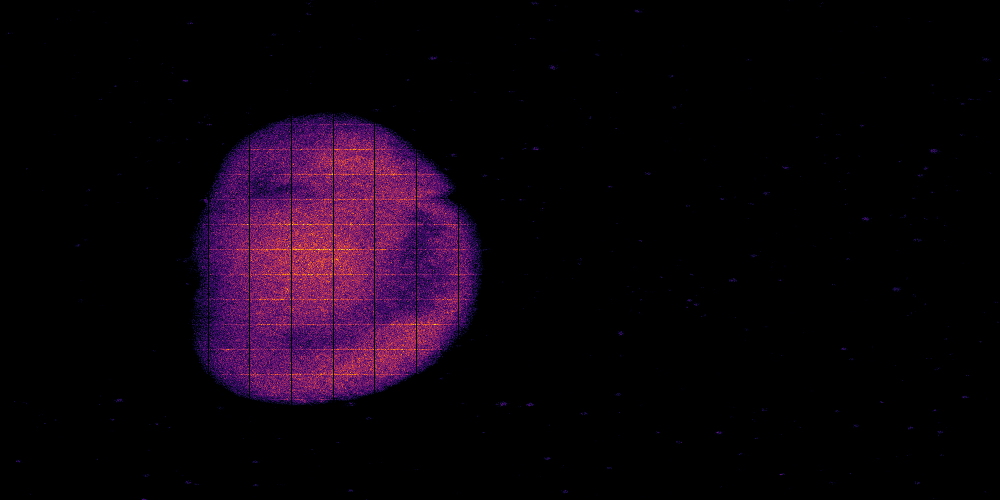

In [30]:
# Sample 1 million points without positional variance, visualize with datashader
#(Not sure why the grid appears)
ls_df = simulate_df_3d(Xs,Ys,Zs, 1000000, threshold=400, datashader=True,arrayout=True)

C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


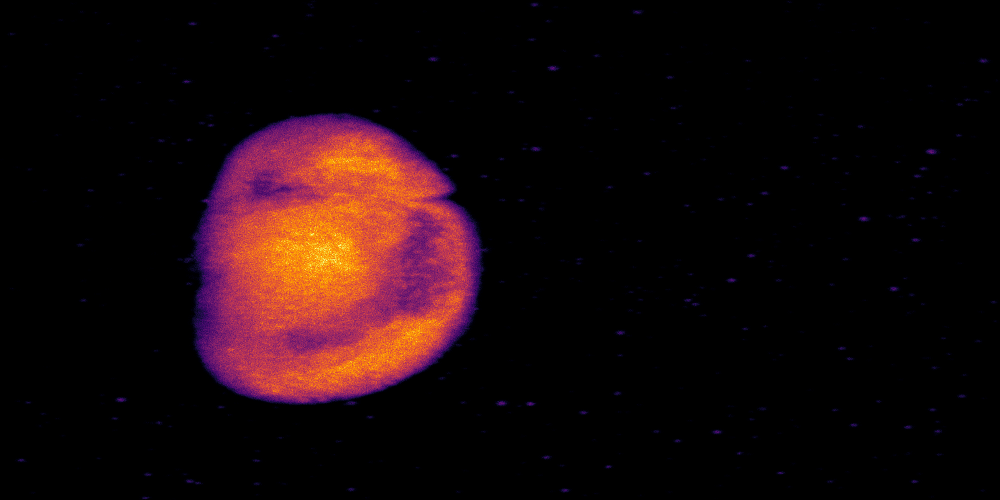

In [31]:
# Sample 10 million points with 1% positional variance, visualize with datashader
ls_df = simulate_df_3d(Xs,Ys,Zs, 10000000, threshold=400, variance=0.1, datashader=True,arrayout=True)

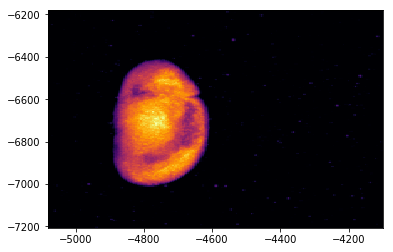

In [32]:
# Sample 1 million points with 0.1% positional variance, visualize with histogram
ls_df = simulate_df_3d(Xs,Ys,Zs, 1000000, threshold=400, variance=1,arrayout=True)